# MODEL TO PREDICT THE HEIGHT FROM WEIGHT OF A PERSON

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("C:\\Users\\LENOVO\\Downloads\\weight-height.csv")

In [4]:
df.shape

(10000, 3)

In [5]:
df.head(10)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971110
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


In [6]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


### Visualization:

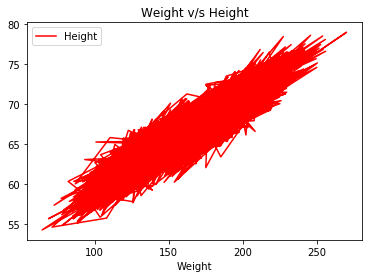

In [7]:
df.plot(x='Weight',y='Height',color='r',title='Weight v/s Height')

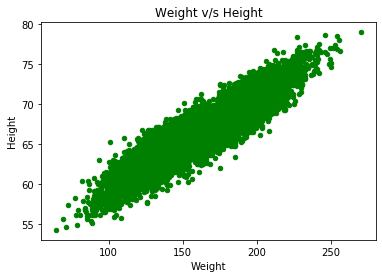

In [8]:
df.plot(kind='scatter',x='Weight',y='Height',color='g',title='Weight v/s Height')

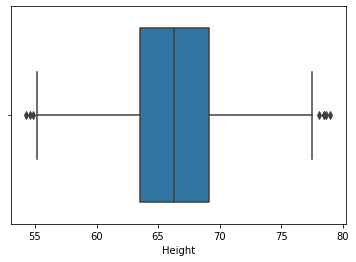

In [9]:
sns.boxplot(df['Height'])

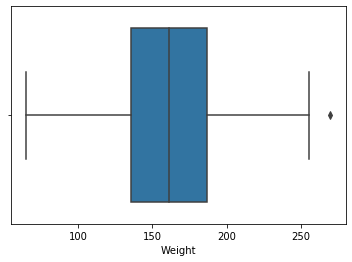

In [10]:
sns.boxplot(df['Weight'])

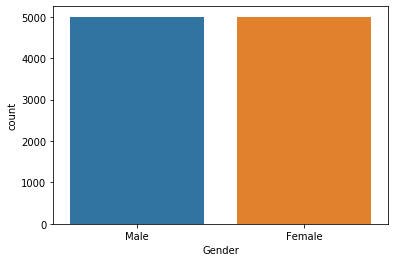

In [11]:
sns.countplot('Gender',data=df)

Text(0, 0.5, 'Frequency')

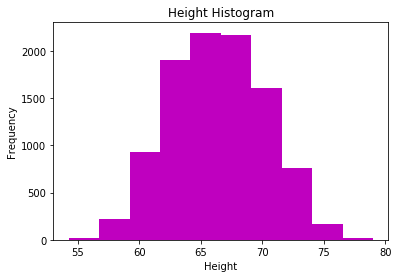

In [12]:
plt.hist(df.Height,color='m')
plt.title('Height Histogram')
plt.xlabel('Height')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

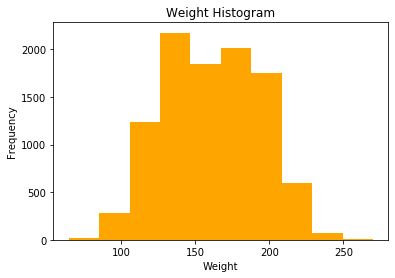

In [13]:
plt.hist(df.Weight,color='orange')
plt.title('Weight Histogram')
plt.xlabel('Weight')
plt.ylabel('Frequency')

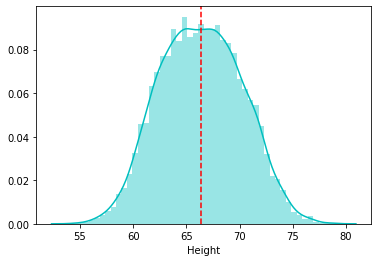

In [14]:
sns.distplot(df['Height'],color='c')
plt.axvline(df['Height'].mean(), color='r', linestyle='--')

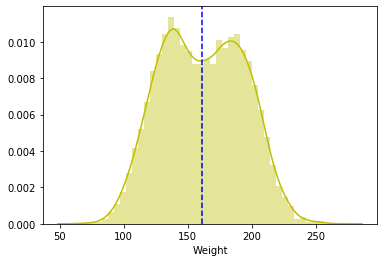

In [15]:
sns.distplot(df['Weight'],color='y')
plt.axvline(df['Weight'].mean(), color='b', linestyle='--')

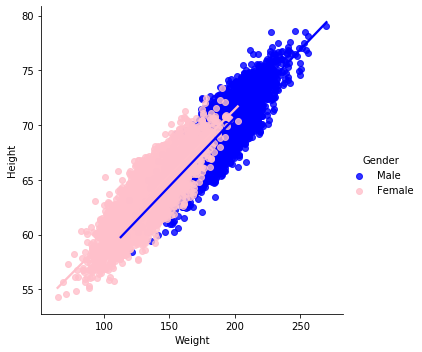

In [18]:
var='Weight'
plot=sns.lmplot(var,'Height',hue='Gender',data=df,palette=['Blue','Pink'])



In [19]:
#Replacing the Gender column male with 1 and female with 0
gender=pd.get_dummies(df.Gender,drop_first=True)

In [20]:
#Adding the gender column
df=pd.concat([df,gender],axis=1)
df

,Gender,Height,Weight,Male
0,Male,73.847017,241.893563,1
1,Male,68.781904,162.310473,1
2,Male,74.110105,212.740856,1
3,Male,71.730978,220.042470,1
4,Male,69.881796,206.349801,1
...,...,...,...,...
9995,Female,66.172652,136.777454,0
9996,Female,67.067155,170.867906,0
9997,Female,63.867992,128.475319,0
9998,Female,69.034243,163.852461,0


In [21]:
#drop the original gender column
df.drop(labels=['Gender'],axis=1)

,Height,Weight,Male
0,73.847017,241.893563,1
1,68.781904,162.310473,1
2,74.110105,212.740856,1
3,71.730978,220.042470,1
4,69.881796,206.349801,1
...,...,...,...
9995,66.172652,136.777454,0
9996,67.067155,170.867906,0
9997,63.867992,128.475319,0
9998,69.034243,163.852461,0


## Applying Linear Regression Model:

In [22]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [23]:
factors=['Weight','Male']

In [24]:
X=pd.DataFrame(df[factors].copy())

In [25]:
y=df.Height.copy()

## Spilitting the Data into Train and Test

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=34)

## Transforming the Dataset- scaling

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
regressor=LinearRegression()

In [33]:
regressor.fit(X_train,y_train)

LinearRegression()

In [34]:
regressor.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [35]:
print(regressor.intercept_)

66.37102307063628


In [36]:
print(regressor.coef_)

[ 3.93059204 -0.49105484]


In [37]:
y_pred=regressor.predict(X_test)

In [38]:
df1=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df1

,Actual,Predicted
2390,69.558052,68.300652
6803,63.204342,63.441839
3226,70.229470,69.995699
8630,68.423169,67.829400
4898,72.831434,71.408013
...,...,...
1356,63.943276,64.944389
1456,62.294695,64.398793
1945,75.009944,73.221225
1162,65.477225,66.502352


## Accuracy and Error

In [44]:
print("The R2_score is",metrics.r2_score(y_test,y_pred))
print("The mean absolute error is",metrics.mean_absolute_error(y_test,y_pred))
print("The mean squared error is",metrics.mean_squared_error(y_test,y_pred))
print("The root mean squared error is",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

The R2_score is 0.8619811089818633
The mean absolute error is 1.156861055979411
The mean squared error is 2.0864595041418275
The root mean squared error is 1.4444582043596235


In [43]:
df2=df1.head(25)

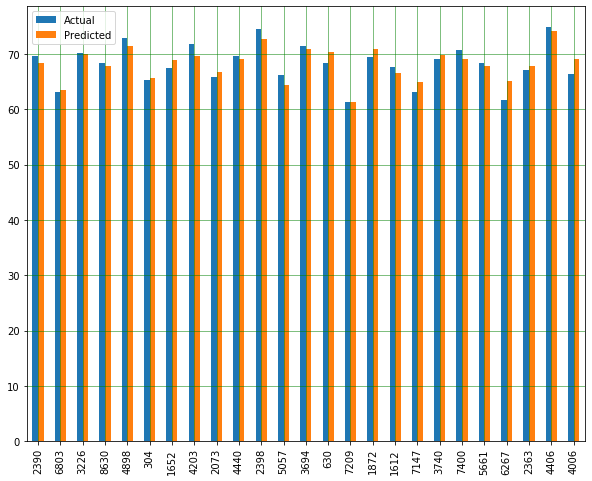

In [25]:
df2.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
